In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [34]:
import yfinance as yf

In [35]:
# data = yf.download(
#     "TSLA",
#     period="1y",
#     interval="1d"
# )

In [36]:
tsla = yf.Ticker("TSLA")
hist = tsla.history(period="1y")
hist.reset_index(inplace=True)


In [37]:

price_df=hist

In [38]:
price_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-01-10 00:00:00-05:00,391.399994,399.279999,377.290009,394.739990,62287300,0.0,0.0
1,2025-01-13 00:00:00-05:00,383.209991,403.790009,380.070007,403.309998,67580500,0.0,0.0
2,2025-01-14 00:00:00-05:00,414.339996,422.640015,394.540009,396.359985,84565000,0.0,0.0
3,2025-01-15 00:00:00-05:00,409.899994,429.799988,405.660004,428.220001,81375500,0.0,0.0
4,2025-01-16 00:00:00-05:00,423.489990,424.000000,409.130005,413.820007,68335200,0.0,0.0
...,...,...,...,...,...,...,...,...
246,2026-01-05 00:00:00-05:00,447.989990,457.549988,444.570007,451.670013,67940800,0.0,0.0
247,2026-01-06 00:00:00-05:00,446.380005,448.250000,428.779999,432.959991,89093800,0.0,0.0
248,2026-01-07 00:00:00-05:00,435.899994,438.369995,431.290009,431.410004,59828800,0.0,0.0
249,2026-01-08 00:00:00-05:00,427.890015,436.890015,424.369995,435.799988,57041100,0.0,0.0


In [39]:
!pip install pytrends

In [40]:
from pytrends.request import TrendReq

In [41]:
trend=TrendReq(hl='en-US', tz=360)

In [42]:
keyword=['TSLA stock']
timeframe = "today 12-m"

In [43]:
from pytrends.request import TrendReq
import pandas as pd
import time

# Create pytrends object WITHOUT retries/backoff
pytrends = TrendReq(hl='en-US', tz=360)

keyword = ["Tesla"]          # safer than "Tesla stock"
timeframe = "today 12-m"     # last 12 months

time.sleep(5)

pytrends.build_payload(
    kw_list=keyword,
    timeframe=timeframe,
    geo='',
    gprop=''
)

time.sleep(5)

trends_df = pytrends.interest_over_time()


/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [44]:
trends_df.drop('isPartial',axis=1,inplace=True)

In [45]:
trends_df

,Tesla
date,
2025-01-05,48
2025-01-12,45
2025-01-19,48
2025-01-26,49
2025-02-02,48
2025-02-09,47
2025-02-16,44
2025-02-23,51
2025-03-02,58


In [46]:
price_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-01-10 00:00:00-05:00,391.399994,399.279999,377.290009,394.739990,62287300,0.0,0.0
1,2025-01-13 00:00:00-05:00,383.209991,403.790009,380.070007,403.309998,67580500,0.0,0.0
2,2025-01-14 00:00:00-05:00,414.339996,422.640015,394.540009,396.359985,84565000,0.0,0.0
3,2025-01-15 00:00:00-05:00,409.899994,429.799988,405.660004,428.220001,81375500,0.0,0.0
4,2025-01-16 00:00:00-05:00,423.489990,424.000000,409.130005,413.820007,68335200,0.0,0.0


In [47]:
price_df["Date"] = price_df["Date"].dt.tz_localize(None)


In [48]:
trends_df = trends_df.reset_index()


In [49]:
trends_df.head()

,date,Tesla
0,2025-01-05,48
1,2025-01-12,45
2,2025-01-19,48
3,2025-01-26,49
4,2025-02-02,48


In [50]:
price_df["Date"] = pd.to_datetime(price_df["Date"])
trends_df['date']=pd.to_datetime(trends_df['date'])

In [51]:
price_df = price_df.sort_values("Date").reset_index(drop=True)
trends_df = trends_df.sort_values("date").reset_index(drop=True)


In [52]:
trends_df.rename(columns={
    "date": "Date",
    "Tesla": "Google_Trend"
}, inplace=True)


In [53]:
merged_df = pd.merge_asof(
    price_df,
    trends_df,
    on="Date",
    direction="backward"
)


In [54]:
merged_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Google_Trend
0,2025-01-10,391.399994,399.279999,377.290009,394.739990,62287300,0.0,0.0,48
1,2025-01-13,383.209991,403.790009,380.070007,403.309998,67580500,0.0,0.0,45
2,2025-01-14,414.339996,422.640015,394.540009,396.359985,84565000,0.0,0.0,45
3,2025-01-15,409.899994,429.799988,405.660004,428.220001,81375500,0.0,0.0,45
4,2025-01-16,423.489990,424.000000,409.130005,413.820007,68335200,0.0,0.0,45


In [55]:
merged_df.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Google_Trend
0,2025-01-10,391.399994,399.279999,377.290009,394.739990,62287300,0.0,0.0,48
1,2025-01-13,383.209991,403.790009,380.070007,403.309998,67580500,0.0,0.0,45
2,2025-01-14,414.339996,422.640015,394.540009,396.359985,84565000,0.0,0.0,45
3,2025-01-15,409.899994,429.799988,405.660004,428.220001,81375500,0.0,0.0,45
4,2025-01-16,423.489990,424.000000,409.130005,413.820007,68335200,0.0,0.0,45
5,2025-01-17,421.500000,439.739990,419.750000,426.500000,94991400,0.0,0.0,45
6,2025-01-21,432.640015,433.200012,406.309998,424.070007,87320900,0.0,0.0,48
7,2025-01-22,416.809998,428.000000,414.589996,415.109985,60963300,0.0,0.0,48
8,2025-01-23,416.059998,420.730011,408.950012,412.380005,50690600,0.0,0.0,48
9,2025-01-24,414.450012,418.880005,405.779999,406.579987,56427100,0.0,0.0,48


In [57]:
import requests
def fetch_wiki_data(article, start, end):
    url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{article}/daily/{start}/{end}"
    headers = {'User-Agent': 'MyProject/1.0 (me@test.com)'}
    response = requests.get(url, headers=headers)
    data = response.json()
    if 'items' in data:
        df = pd.DataFrame(data['items'])
        df = df[['timestamp', 'views']]
        df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H')
        df.rename(columns={'timestamp': 'Date', 'views': 'Wiki_Views'}, inplace=True)
        return df
    else:
        return  pd.DataFrame()
s_date = merged_df['Date'].min().strftime('%Y%m%d')
e_date = merged_df['Date'].max().strftime('%Y%m%d')

print(f"Getting wiki views from {s_date} to {e_date}...")
wiki_df = fetch_wiki_data("Tesla,_Inc.", s_date, e_date)
wiki_df.head()
    

Getting wiki views from 20250110 to 20260109...


,Date,Wiki_Views
0,2025-01-10,10569
1,2025-01-11,9136
2,2025-01-12,8514
3,2025-01-13,9284
4,2025-01-14,9031


In [58]:
merged_df = pd.merge(merged_df, wiki_df, on="Date", how="left")

In [60]:
merged_df['Wiki_Views'] = merged_df['Wiki_Views'].fillna(method='ffill')
merged_df.head()

/tmp/ipykernel_47/806083567.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['Wiki_Views'] = merged_df['Wiki_Views'].fillna(method='ffill')


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Google_Trend,Wiki_Views
0,2025-01-10,391.399994,399.279999,377.290009,394.739990,62287300,0.0,0.0,48,10569
1,2025-01-13,383.209991,403.790009,380.070007,403.309998,67580500,0.0,0.0,45,9284
2,2025-01-14,414.339996,422.640015,394.540009,396.359985,84565000,0.0,0.0,45,9031
3,2025-01-15,409.899994,429.799988,405.660004,428.220001,81375500,0.0,0.0,45,9214
4,2025-01-16,423.489990,424.000000,409.130005,413.820007,68335200,0.0,0.0,45,9184


In [61]:
corr = merged_df[['Close', 'Google_Trend', 'Wiki_Views', 'Volume']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Close,Google_Trend,Wiki_Views,Volume
Close,1.000000,-0.489764,-0.203882,-0.475439
Google_Trend,-0.489764,1.000000,0.529845,0.439079
Wiki_Views,-0.203882,0.529845,1.000000,0.186759
Volume,-0.475439,0.439079,0.186759,1.000000


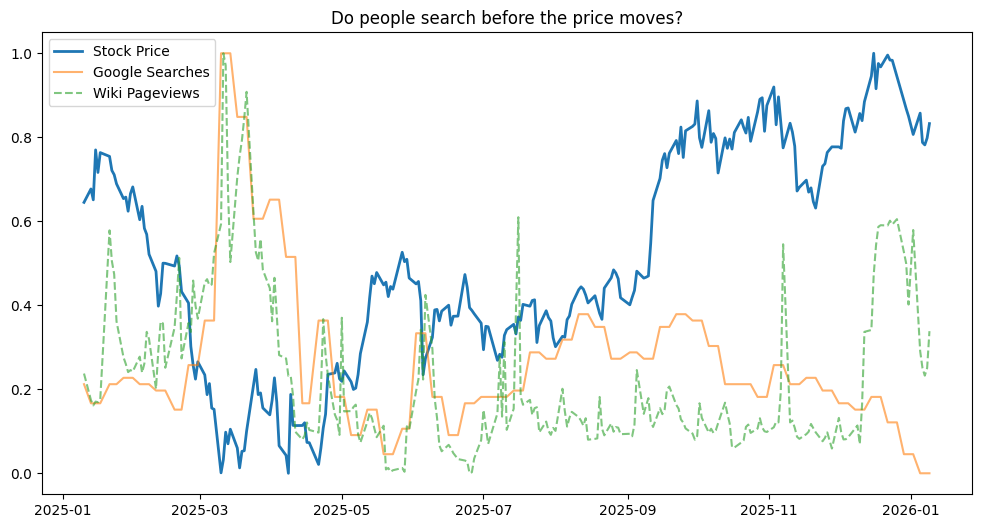

In [62]:
import matplotlib.pyplot as plt
temp_df = merged_df.copy()
cols = ['Close', 'Google_Trend', 'Wiki_Views']

for c in cols:
    temp_df[c] = (temp_df[c] - temp_df[c].min()) / (temp_df[c].max() - temp_df[c].min())

plt.figure(figsize=(12, 6))
plt.plot(temp_df['Date'], temp_df['Close'], label='Stock Price', linewidth=2)
plt.plot(temp_df['Date'], temp_df['Google_Trend'], label='Google Searches', alpha=0.6)
plt.plot(temp_df['Date'], temp_df['Wiki_Views'], label='Wiki Pageviews', alpha=0.6, linestyle='--')
plt.title("Do people search before the price moves?")
plt.legend()
plt.show()

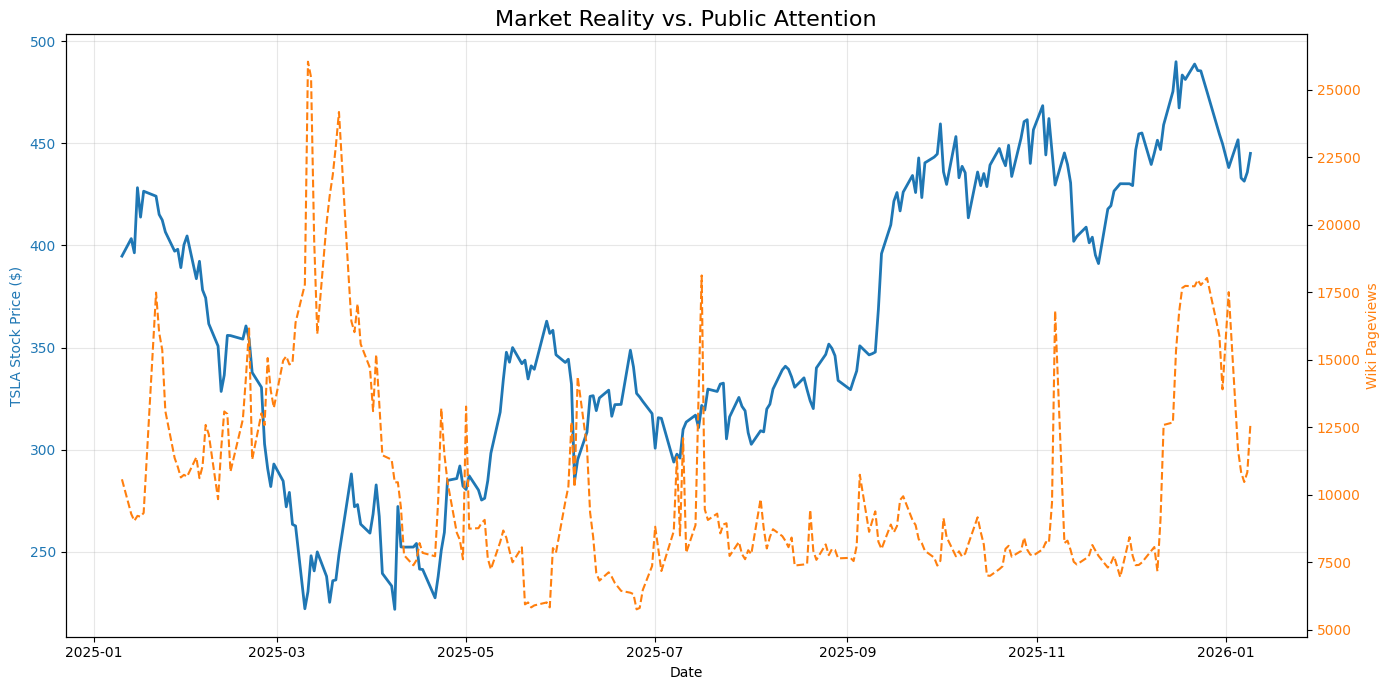

In [63]:
fig, ax1 = plt.subplots(figsize=(14, 7))


color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('TSLA Stock Price ($)', color=color)
ax1.plot(merged_df['Date'], merged_df['Close'], color=color, linewidth=2, label='TSLA Price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)


ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('Wiki Pageviews', color=color)
ax2.plot(merged_df['Date'], merged_df['Wiki_Views'], color=color, linestyle='--', linewidth=1.5, label='Wiki Interest')
ax2.tick_params(axis='y', labelcolor=color)

title = "Market Reality vs. Public Attention"
plt.title(title, fontsize=16)
fig.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


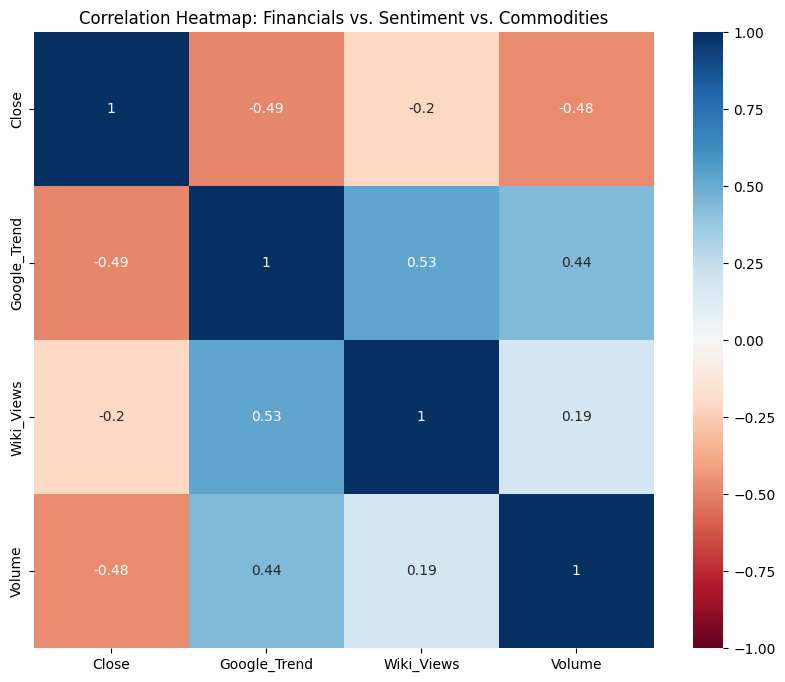

In [64]:
import seaborn as sns

plt.figure(figsize=(10, 8))
features = ['Close', 'Google_Trend', 'Wiki_Views', 'Lithium_ETF', 'RSI', 'Volume']

available_features = [f for f in features if f in merged_df.columns]
corr_matrix = merged_df[available_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap: Financials vs. Sentiment vs. Commodities')
plt.show()

In [65]:
delta = merged_df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
merged_df['RSI'] = 100 - (100 / (1 + rs))

merged_df['SMA_20'] = merged_df['Close'].rolling(window=20).mean()
merged_df['Upper_Band'] = merged_df['SMA_20'] + (merged_df['Close'].rolling(window=20).std() * 2)
merged_df['Lower_Band'] = merged_df['SMA_20'] - (merged_df['Close'].rolling(window=20).std() * 2)


merged_df = merged_df.bfill()

print("Technical Indicators (RSI, Bollinger Bands) added.")
merged_df.tail()

Technical Indicators (RSI, Bollinger Bands) added.


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Google_Trend,Wiki_Views,RSI,SMA_20,Upper_Band,Lower_Band
246,2026-01-05,447.989990,457.549988,444.570007,451.670013,67940800,0.0,0.0,34,11656,47.461883,464.124004,499.022647,429.225360
247,2026-01-06,446.380005,448.250000,428.779999,432.959991,89093800,0.0,0.0,34,10833,35.493593,463.022003,500.435082,425.608924
248,2026-01-07,435.899994,438.369995,431.290009,431.410004,59828800,0.0,0.0,34,10469,28.010527,462.613504,501.262289,423.964719
249,2026-01-08,427.890015,436.890015,424.369995,435.799988,57041100,0.0,0.0,34,10831,36.288341,462.145003,501.895568,422.394438
250,2026-01-09,435.950012,449.049988,430.390015,445.010010,67185700,0.0,0.0,34,12617,32.211101,461.823003,502.039945,421.606060


In [66]:
print("Fetching Global X Lithium & Battery Tech ETF (LIT) data...")
lit = yf.Ticker("LIT")
lit_hist = lit.history(period="1y")
lit_hist.reset_index(inplace=True)


lit_df = lit_hist[['Date', 'Close']].rename(columns={'Close': 'Lithium_ETF'})

lit_df['Date'] = lit_df['Date'].dt.tz_localize(None)


merged_df = pd.merge(merged_df, lit_df, on="Date", how="left")
merged_df['Lithium_ETF'] = merged_df['Lithium_ETF'].fillna(method='ffill')

print("Added Lithium_ETF to the dataset.")
merged_df[['Date', 'Close', 'Lithium_ETF']].tail()

Fetching Global X Lithium & Battery Tech ETF (LIT) data...
Added Lithium_ETF to the dataset.


/tmp/ipykernel_47/1389954723.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['Lithium_ETF'] = merged_df['Lithium_ETF'].fillna(method='ffill')


,Date,Close,Lithium_ETF
246,2026-01-05,451.670013,67.410004
247,2026-01-06,432.959991,69.570000
248,2026-01-07,431.410004,68.989998
249,2026-01-08,435.799988,68.080002
250,2026-01-09,445.010010,68.209999


Feature Engineering Complete. Final Columns:
['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Google_Trend', 'Wiki_Views', 'RSI', 'SMA_20', 'Upper_Band', 'Lower_Band', 'Lithium_ETF']


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


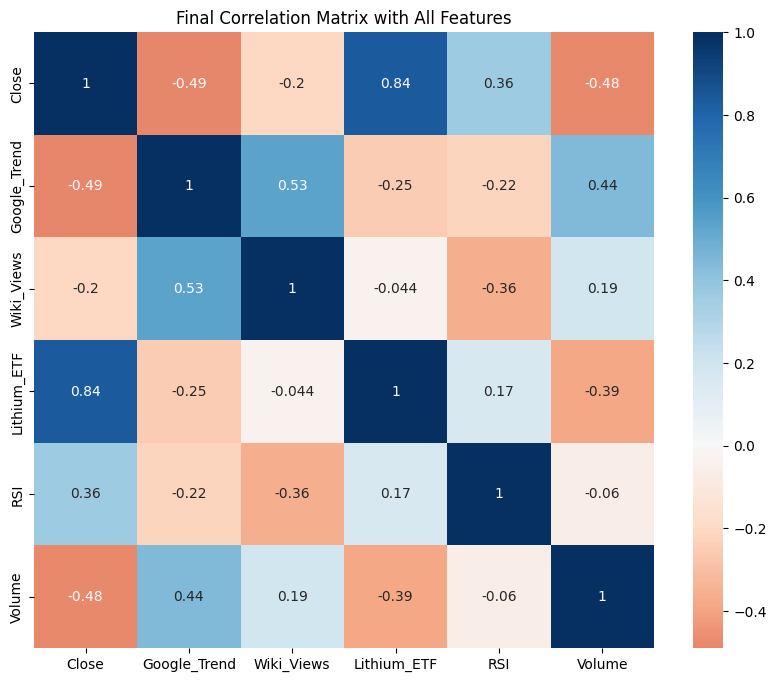

In [67]:
print("Feature Engineering Complete. Final Columns:")
print(merged_df.columns.tolist())



final_cols = [c for c in ['Close', 'Google_Trend', 'Wiki_Views', 'Lithium_ETF', 'RSI', 'Volume'] if c in merged_df.columns]
if final_cols:
    plt.figure(figsize=(10, 8))
    sns.heatmap(merged_df[final_cols].corr(), annot=True, cmap='RdBu', center=0)
    plt.title("Final Correlation Matrix with All Features")
    plt.show()
    

In [68]:
delta = merged_df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
merged_df['RSI'] = 100 - (100 / (1 + rs))



merged_df['SMA_20'] = merged_df['Close'].rolling(window=20).mean()
merged_df['Upper_Band'] = merged_df['SMA_20'] + (merged_df['Close'].rolling(window=20).std() * 2)
merged_df['Lower_Band'] = merged_df['SMA_20'] - (merged_df['Close'].rolling(window=20).std() * 2)


merged_df = merged_df.bfill()

merged_df[['Date', 'Close', 'RSI', 'Upper_Band']].tail()


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


,Date,Close,RSI,Upper_Band
246,2026-01-05,451.670013,47.461883,499.022647
247,2026-01-06,432.959991,35.493593,500.435082
248,2026-01-07,431.410004,28.010527,501.262289
249,2026-01-08,435.799988,36.288341,501.895568
250,2026-01-09,445.010010,32.211101,502.039945


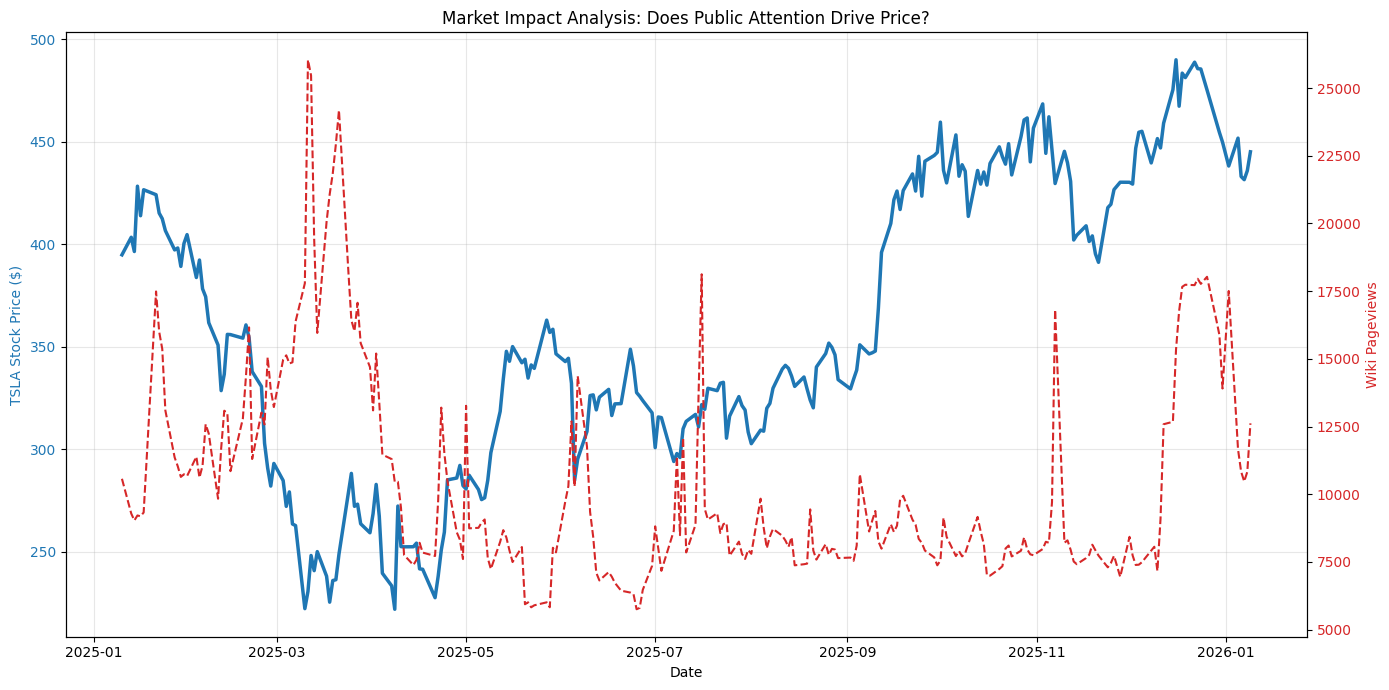

In [69]:
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('TSLA Stock Price ($)', color=color)
ax1.plot(merged_df['Date'], merged_df['Close'], color=color, linewidth=2.5, label='TSLA Price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)



ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Wiki Pageviews', color=color)
ax2.plot(merged_df['Date'], merged_df['Wiki_Views'], color=color, linestyle='--', linewidth=1.5, label='Wiki Views')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Market Impact Analysis: Does Public Attention Drive Price?')
fig.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


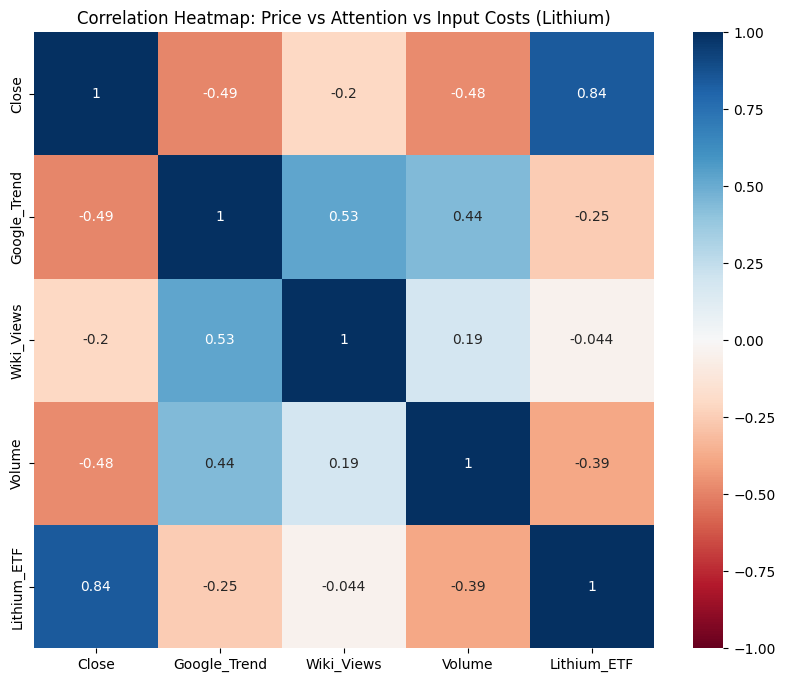

In [70]:
import seaborn as sns

plt.figure(figsize=(10, 8))

corr_matrix = merged_df[['Close', 'Google_Trend', 'Wiki_Views', 'Volume', 'Lithium_ETF']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap: Price vs Attention vs Input Costs (Lithium)')
plt.show()



In [74]:
print("Fetching Lithium ETF (LIT) data...")
lit = yf.Ticker("LIT")
lit_hist = lit.history(period="1y")
lit_hist.reset_index(inplace=True)


lit_df = lit_hist[['Date', 'Close']].rename(columns={'Close': 'Lithium_ETF'})
lit_df['Date'] = lit_df['Date'].dt.tz_localize(None)


merged_df = pd.merge(merged_df, lit_df, on="Date", how="left")
merged_df['Lithium_ETF'] = merged_df['Lithium_ETF'].fillna(method='ffill')

merged_df.head()

Fetching Lithium ETF (LIT) data...


/tmp/ipykernel_47/157446173.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['Lithium_ETF'] = merged_df['Lithium_ETF'].fillna(method='ffill')
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/u

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Google_Trend,Wiki_Views,...,SMA_20,Upper_Band,Lower_Band,Lithium_ETF_x,Lithium_ETF_y,SMA_10,SMA_30,Signal_State,Crossover,Lithium_ETF
0,2025-01-10,391.399994,399.279999,377.290009,394.739990,62287300,0.0,0.0,48,10569,...,400.015498,435.060127,364.97087,39.522072,39.522072,NaN,NaN,0,NaN,39.522076
1,2025-01-13,383.209991,403.790009,380.070007,403.309998,67580500,0.0,0.0,45,9284,...,400.015498,435.060127,364.97087,40.277336,40.277336,NaN,NaN,0,0.0,40.277332
2,2025-01-14,414.339996,422.640015,394.540009,396.359985,84565000,0.0,0.0,45,9031,...,400.015498,435.060127,364.97087,40.913342,40.913342,NaN,NaN,0,0.0,40.913342
3,2025-01-15,409.899994,429.799988,405.660004,428.220001,81375500,0.0,0.0,45,9214,...,400.015498,435.060127,364.97087,41.608978,41.608978,NaN,NaN,0,0.0,41.608978
4,2025-01-16,423.489990,424.000000,409.130005,413.820007,68335200,0.0,0.0,45,9184,...,400.015498,435.060127,364.97087,41.360542,41.360542,NaN,NaN,0,0.0,41.360538


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


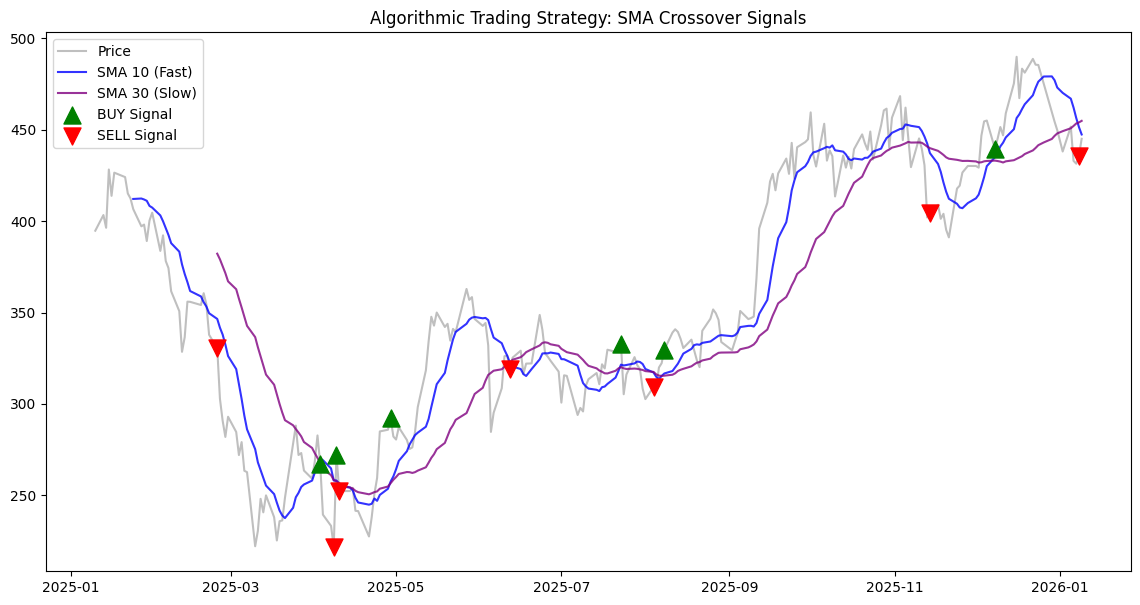

In [73]:
try:
    merged_df['SMA_10'] = merged_df['Close'].rolling(window=10).mean()
    merged_df['SMA_30'] = merged_df['Close'].rolling(window=30).mean()


    def get_signal(row):
        if row['SMA_10'] > row['SMA_30']:
            return 1 
        elif row['SMA_10'] < row['SMA_30']:
            return -1
        else:
            return 0


    merged_df['Signal_State'] = merged_df.apply(get_signal, axis=1)

    
    merged_df['Crossover'] = merged_df['Signal_State'].diff() 


    buys = merged_df[merged_df['Crossover'] > 0]
    sells = merged_df[merged_df['Crossover'] < 0]

    plt.figure(figsize=(14, 7))
    plt.plot(merged_df['Date'], merged_df['Close'], label='Price', alpha=0.5, color='gray')
    plt.plot(merged_df['Date'], merged_df['SMA_10'], label='SMA 10 (Fast)', color='blue', alpha=0.8)
    plt.plot(merged_df['Date'], merged_df['SMA_30'], label='SMA 30 (Slow)', color='purple', alpha=0.8)


    plt.scatter(buys['Date'], buys['Close'], marker='^', color='green', s=150, label='BUY Signal', zorder=5)
    plt.scatter(sells['Date'], sells['Close'], marker='v', color='red', s=150, label='SELL Signal', zorder=5)

    plt.title('Algorithmic Trading Strategy: SMA Crossover Signals')
    plt.legend()
    plt.show()

except Exception as e:
    print(f"Error plotting Algo signals: {e}")

In [75]:
try:
    print("Fetching CBOE Volatility Index (^VIX) data...")
    vix = yf.Ticker("^VIX")
    vix_hist = vix.history(period="1y")

    if not vix_hist.empty:
        vix_hist.reset_index(inplace=True)
        vix_df = vix_hist[['Date', 'Close']].rename(columns={'Close': 'VIX_Fear_Index'})
        

        if vix_df['Date'].dt.tz is not None:
            vix_df['Date'] = vix_df['Date'].dt.tz_localize(None)


        if 'VIX_Fear_Index' in merged_df.columns:
            merged_df.drop(columns=['VIX_Fear_Index'], inplace=True)
            
        merged_df = pd.merge(merged_df, vix_df, on="Date", how="left")
        merged_df['VIX_Fear_Index'] = merged_df['VIX_Fear_Index'].fillna(method='ffill')
        
        print("Success! VIX_Fear_Index added. (High VIX = Market Fear/Panic)")
    else:
        print("Warning: VIX data empty.")
        merged_df['VIX_Fear_Index'] = 0.0

except Exception as e:
    print(f"Error fetching VIX: {e}")

merged_df[['Date', 'Close', 'VIX_Fear_Index']].tail()

Fetching CBOE Volatility Index (^VIX) data...
Success! VIX_Fear_Index added. (High VIX = Market Fear/Panic)


/tmp/ipykernel_47/1676827460.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['VIX_Fear_Index'] = merged_df['VIX_Fear_Index'].fillna(method='ffill')


,Date,Close,VIX_Fear_Index
246,2026-01-05,451.670013,14.90
247,2026-01-06,432.959991,14.75
248,2026-01-07,431.410004,15.38
249,2026-01-08,435.799988,15.45
250,2026-01-09,445.010010,14.49


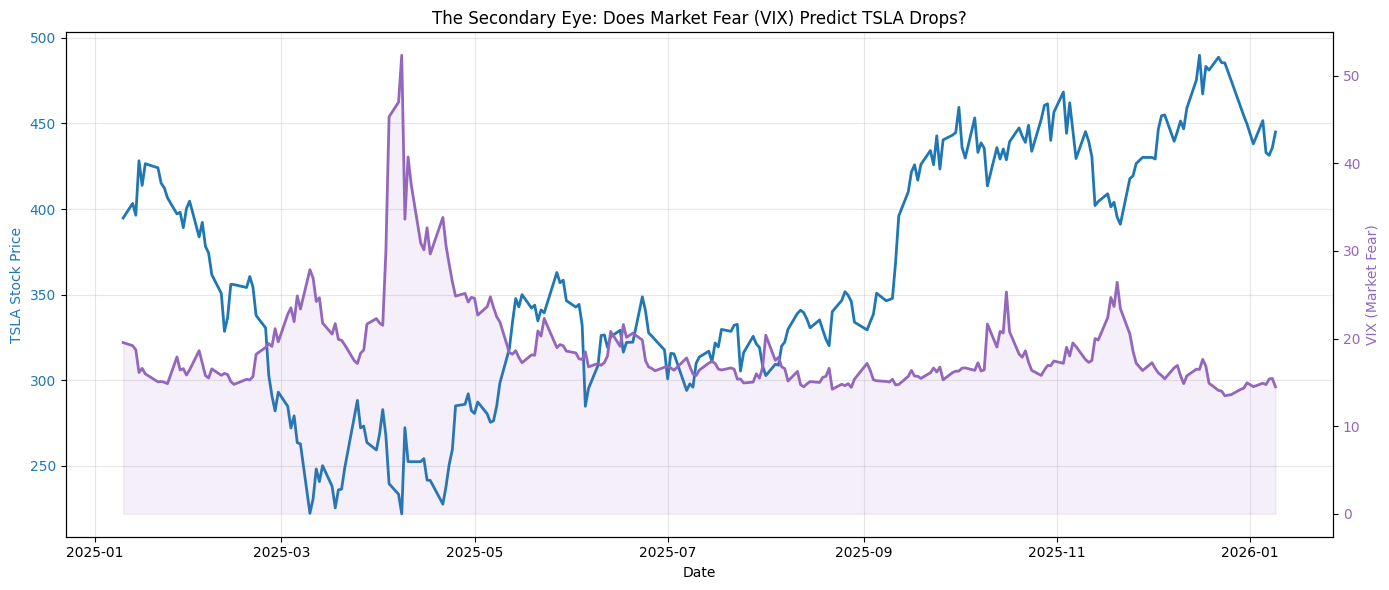

In [76]:
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('TSLA Stock Price', color=color)
ax1.plot(merged_df['Date'], merged_df['Close'], color=color, linewidth=2, label='TSLA Price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()  
color = 'tab:purple'
ax2.set_ylabel('VIX (Market Fear)', color=color)

ax2.plot(merged_df['Date'], merged_df['VIX_Fear_Index'], color=color, linestyle='-', linewidth=2, label='VIX Fear Index')
ax2.fill_between(merged_df['Date'], merged_df['VIX_Fear_Index'], color=color, alpha=0.1)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("The Secondary Eye: Does Market Fear (VIX) Predict TSLA Drops?")
fig.tight_layout()
plt.show()